# Calcul de la résolution axiale

In [1]:
import numpy as np
# import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

## Définition des matrices de transfert

In [2]:
def Mt(d):
    '''Translation'''
    M = np.array([[1, d],
                  [0, 1]])
    return M

def Ml(f):
    '''Thin Lens'''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

## Paramètres du système

In [3]:
# distances focales des lentilles
f = sp.symbols('f')

# diamètre des lentilles
phi = sp.symbols('phi')

# diamètre du sténopé
d = sp.symbols('d')

# distance entre les lentilles
L = sp.symbols('L')

# distance entre la lentille f1 et le plan focal
z = sp.symbols('z')

## Matrice de transfert

- $M_{t1}$ entre le plan focal et $f_1$
- $M_{f1}$ pour la lentille $f_1$
- $M_{t2}$ entre $f_1$ et $f_2$
- $M_{f2}$ pour la lentille $f_2$
- $M_{t3}$ entre $f_2$ et le pinhole

$$M = M_{t3}M_{f2}M_{t2}M_{f1}M_{t1}$$ 

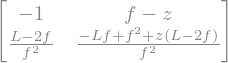

In [4]:
M = Mt(f)@Ml(f)@Mt(L)@Ml(f)@Mt(z)
sp.simplify(M)

### Vérification de la validité par le calcul du déterminant

Si égal à 1, c'est valide.

In [5]:
M_sp = sp.Matrix(M)
M_sp.det()

## Rayon de chaque côté du sténopé

In [6]:
# en haut du sténopé
yf1 = d/2
alphaf1 = -sp.atan((phi-d)/(2*f))

# en bas du sténopé
yf2 = -d/2
alphaf2 = -sp.atan((phi+d)/(2*f))

## Vecteurs des rayons

In [7]:
alphai1 = sp.symbols("alpha_i1")
alphai2 = sp.symbols("alpha_i2")

vf1 = sp.Matrix([yf1, alphaf1])
vf2 = sp.Matrix([yf2, alphaf2])

## Résolution des systèmes d'équations

$$y_f = M y_i$$

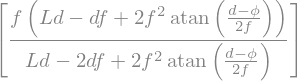

In [8]:
solve1 = M_sp.LUsolve(vf1)
z1 = sp.solve(solve1[0], z)
z1

In [9]:
values = {f:35e-3, phi:25.4e-3, d:75e-6, L:35e-3}
z1[0].subs(values)

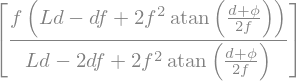

In [10]:
solve2 = M_sp.LUsolve(vf2)
z2 = sp.solve(solve2[0], z)
z2

In [11]:
z2[0].subs(values)

In [12]:
z2[0].subs(values) - z1[0].subs(values)

## Wrap tout dans une fonction

In [17]:
def res_axial(pinhole, focal, lens_distance):
    """
    Calcule la résolution axiale en fonction du diamètre du trou, de la focale, et de la distance entre les lentilles.

    Paramètres :
    ------------
    pinhole : float
        Diamètre du trou en mètres.
    focal : float
        Longueur focale de la lentille en mètres.
    lens_distance : float
        Distance entre les lentilles en mètres.

    Retour :
    --------
    res : expression symbolique
        La résolution axiale en mètres.
    """
    f = sp.symbols('f')
    phi = sp.symbols('phi')
    d = sp.symbols('d')
    L = sp.symbols('L')
    z = sp.symbols('z')

    M = Mt(f)@Ml(f)@Mt(L)@Ml(f)@Mt(z)
    M_sp = sp.Matrix(M)
    
    yf1 = d/2
    alphaf1 = -sp.atan((phi-d)/(2*f))
    
    yf2 = -d/2
    alphaf2 = -sp.atan((phi+d)/(2*f))

    alphai1 = sp.symbols("alpha_i1")
    alphai2 = sp.symbols("alpha_i2")

    vf1 = sp.Matrix([yf1, alphaf1])
    vf2 = sp.Matrix([yf2, alphaf2])

    solve1 = M_sp.LUsolve(vf1)
    z1 = sp.solve(solve1[0], z)

    solve2 = M_sp.LUsolve(vf2)
    z2 = sp.solve(solve2[0], z)

    values = {f:focal, phi:25.4e-3, d:pinhole, L:lens_distance}
    res = z2[0].subs(values) - z1[0].subs(values)

    return res

In [14]:
f = L = 35e-3
d = 75e-6
res_axial(d, f, L)

0.000215466319119513


In [15]:
import matplotlib.pyplot as plt

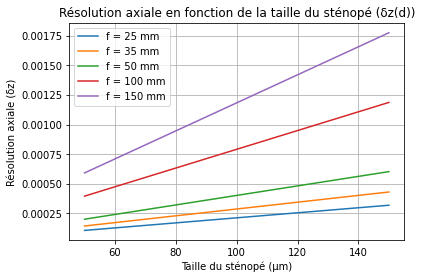

In [18]:
focals = [25e-3, 35e-3, 50e-3, 100e-3, 150e-3]
pinhole_sizes = np.linspace(50e-6, 150e-6, 100)
L = lambda f: f

for f in focals:
    res_values = [res_axial(d, f, L(f)) for d in pinhole_sizes]
    plt.plot(pinhole_sizes * 1e6, res_values, label=f'f = {f*1e3:.0f} mm')

plt.xlabel("Taille du sténopé (µm)")
plt.ylabel("Résolution axiale (δz)")
plt.legend()
plt.grid(True)
plt.title("Résolution axiale en fonction de la taille du sténopé (δz(d))")
plt.show()

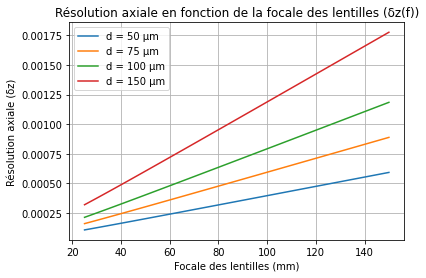

In [20]:
pinhole_sizes = [50e-6, 75e-6, 100e-6, 150e-6]
focals = np.linspace(25e-3, 150e-3, 100)
L = lambda f: f  # si L(f) appelé, L = f

# Tracer une courbe pour chaque taille de sténopé
for pinhole in pinhole_sizes:
    res_values = [res_axial(pinhole, f, L(f)) for f in focals]
    plt.plot(focals * 1e3, res_values, label=f'd = {pinhole*1e6:.0f} µm')

# Paramètres d'affichage
plt.xlabel("Focale des lentilles (mm)")
plt.ylabel("Résolution axiale (δz)")
plt.legend()
plt.grid(True)
plt.title("Résolution axiale en fonction de la focale des lentilles (δz(f))")
plt.show()


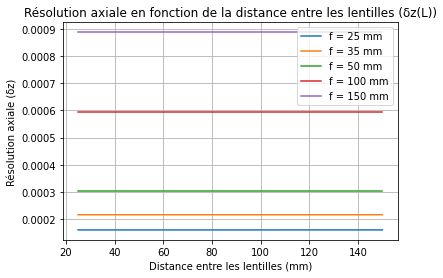

In [21]:
pinhole = 75e-6  # 75 µm
focals = [25e-3, 35e-3, 50e-3, 100e-3, 150e-3]  # en mètres
lens_distances = np.linspace(25e-3, 150e-3, 100)  # en mètres

for f in focals:
    res_values = [res_axial(pinhole, f, L) for L in lens_distances]
    plt.plot(lens_distances * 1e3, res_values, label=f'f = {f*1e3:.0f} mm')

plt.xlabel("Distance entre les lentilles (mm)")
plt.ylabel("Résolution axiale (δz)")
plt.legend()
plt.grid(True)
plt.title("Résolution axiale en fonction de la distance entre les lentilles (δz(L))")
plt.show()